Unit 1 Project

In [ ]:
#Import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

master = files.upload()
#grand_master = files.upload()
#challenger = files.upload()

Saving Master_Ranked_Games.csv to Master_Ranked_Games.csv


In [ ]:
masterDf = pd.read_csv('Master_Ranked_Games.csv')
#grand_masterDf = pd.read_csv(grand_master)
#challengerDf = pd.read_csv(challenger)

#Getting the data that we want
masterDf.head()

#Getting the first tower counts and the win counts
first_tower_df = pd.DataFrame(masterDf['blueFirstTower']) 
first_tower_df['redFirstTower'] = masterDf['redFirstTower']
first_tower_df['blueWins'] = masterDf['blueWins']
first_tower_df['redWins'] = masterDf['redWins']
first_tower_df.head()

In [ ]:
#Just some totals to help 
#Crosstab visualization for blue

margins_towers_blue = pd.crosstab(first_tower_df['blueWins'],first_tower_df['blueFirstTower'],margins=True,normalize=True)*100
margins_towers_blue

blueFirstTower,0,1,All
blueWins,,,
0,36.366861,14.119953,50.486814
1,12.292182,37.221004,49.513186
All,48.659043,51.340957,100.000000


In [ ]:
#Crosstab visualization for red
towers_red = pd.crosstab(first_tower_df['redFirstTower'],first_tower_df['redWins'], margins=True)
margins_towers_red = pd.crosstab(first_tower_df['redFirstTower'],first_tower_df['redWins'], margins=True,normalize=True)*100
margins_towers_red
towers_red



redWins,0,1,All
redFirstTower,,,
0,40513,15845,56358
1,12528,38239,50767
All,53041,54084,107125


0.7070298197069833
0.2929702001001687
0.298731170318953
0.23619463712151345


##$H_0$: First destroyed turret is not related to winning on red side in master tier vs. $H_a$: First destroyed turret is related to winning on red side in master tier
##Alpha = 0.05

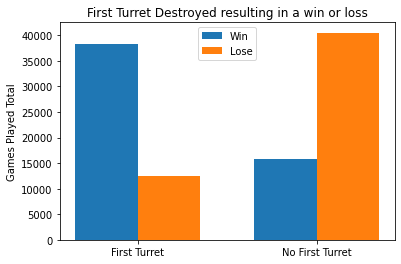

In [ ]:
import numpy as np
n = 2
red_wins = (38239, 15845)
red_loses = (12528, 40513)

ind = np.arange(n)
width = .35

#Creating the plot
fig, ax = plt.subplots()
rect1 = ax.bar(ind,red_wins,width)
rec2 = ax.bar(ind+width, red_loses, width)

ax.set_ylabel('Games Played Total')
ax.set_title('First Turret Destroyed resulting in a win or loss')

ax.set_xticks(ind + width/2)
ax.set_xticklabels(('First Turret','No First Turret'))
ax.legend(['Win','Lose']);

In [ ]:
38239 + 15845
12528 + 40513

53041

redWins,0,1,All
redFirstTower,,,
0,40513,15845,56358
1,12528,38239,50767
All,53041,54084,107125


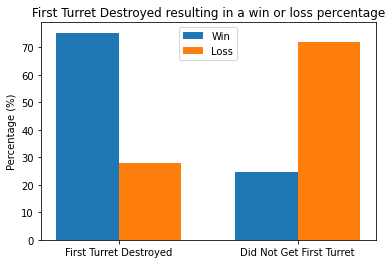

In [ ]:
#Another Graph
n = 2
first_turret_destroyed = (15845/56358*100, 40513/56358*100)
first_turret_notdestroyed = (38239/50767*100, 12528/50767*100)
38239/50767*100
40513/56358*100
12528/50767*100
ind = np.arange(n)
width = .35

#Creating the plot
fig, ax = plt.subplots()
rect1 = ax.bar(ind,first_turret_notdestroyed,width)
rec2 = ax.bar(ind + width, first_turret_destroyed, width)

ax.set_ylabel('Percentage (%)')
ax.set_title('First Turret Destroyed resulting in a win or loss percentage')

ax.set_xticks(ind + width/2)
ax.set_xticklabels(('First Turret Destroyed','Did Not Get First Turret'))
ax.legend(['Win','Loss']);
towers_red

In [ ]:
#Another way to do it
g, p_val, dof, expct = chi2_contingency(pd.crosstab(index=first_tower_df['redFirstTower'], columns = first_tower_df['redWins']))
# Print out the p-value
print('The p-value is:', p_val)
# print(g ,'\n', dof, '\n', expct)


The p-value is: 0.0
23808.805319751482 
 1 
 [[27904.64110152 28453.35889848]
 [25136.35889848 25630.64110152]]
